<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [23.2 The Shooting Method](chapter23.02-The-Shooting-Method.ipynb) | [Contents](Index.ipynb) | [23.4 Numerical Error and Instability](chapter23.04-Numerical-Error-and-Instability.ipynb) >

# Finite Difference Method

Another way to solve the ODE boundary value problems is the **finite difference method**, where we can use finite difference formulas at evenly spaced grid points to approximate the differential equations. This way, we can transform a differential equation into a system of algebraic equations to solve. 

In the finite difference method, the derivatives in the differential equation are approximated using the finite difference formulas. We can divide the the interval of $[a, b]$ into $n$ equal subintervals of length $h$ as shown in the following figure. 

<img src="images/23.03.01-Finite-difference.png" alt="finite difference" title="Finite difference grids" width="500"/>

Commonly, we usually use the central difference formulas in the finite difference methods due to the fact that they yield better accuracy. The differential equation is enforced only at the grid points, and the first and second derivatives are:

$$\frac{dy}{dx} = \frac{y_{i+1}-y_{i-1}}{2h}$$

$$\frac{d^2y}{dx^2} = \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

These finite difference expressions are used to replace the derivatives of $y$ in the differential equation which leads to a system of $n+1$ linear algebraic equations if the differential equation is linear. If the differential equation is nonlinear, the algebraic equations will also be nonlinear.  

**EXAMPLE:** Solve the rocket problem in the previous section using the finite difference method, plot the altitude of the rocket after launching. The ODE is

$$ \frac{d^2y}{dt^2} = -g$$

with the boundary conditions $y(0) = 0$ and $y(5) = 50$. Let's take $n=10$. 

Since the time interval is $[0, 5]$ and we have $n=10$, therefore, $h=0.5$, using the finite difference approximated derivatives, we have 

$$ y_0 = 0$$

$$ y_{i-1} - 2y_i + y_{i+1} = -gh^2, \;i = 1, 2, ..., n-1$$

$$ y_{10} = 50$$

if we use matrix notation, we will have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2& 1 \\
 & & & &1
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\-gh^2 \\ ... \\ -gh^2 \\50\end{array}\right]$$

Therefore, we have 11 equations in the system, we can solve it using the method we learned in chapter 14. 

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


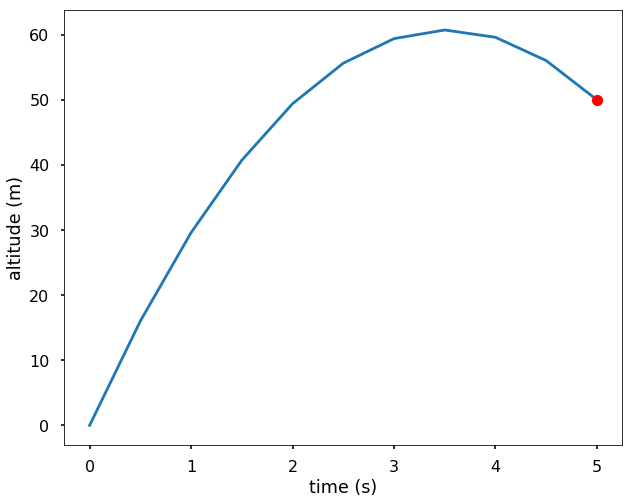

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

Now, let's solve $y'(0)$, from the finite difference formula, we know that $\frac{dy}{dx} = \frac{y_{i+1}-y_{i-1}}{2h}$, which means that $y'(0) = \frac{y_{1} - y_{-1}}{2h}$, but we don't know what is $y_{-1}$. Actually, we can calculate $y_{-1}$ since we know the $y$ values on each grid point. From the 2nd derivative finite difference formula, we know that $\frac{y_{-1}-2y_0+y_{1}}{h^2} = -g$, therefore, we can solve for $y_{-1}$ and then get the launching velocity. See the calculation below. 

In [2]:
y_n1 = -9.8*h**2 + 2*y[0] - y[1]
(y[1] - y_n1) / (2*h)

34.5

We can see that we get the correct launching velocity using the finite difference method. To make you more comfortable with the method, let's see another example. 

**TRY IT!** Using finite difference method to solve the following linear boundary value problem

$$ y'' = -4y +4x $$

with the boundary conditions as $y(0) = 0$ and $y'(\pi/2)=0$. The exact solution of the problem is $y=x-sin2x$, plot the errors against the n grid points (n from 3 to 100) for the boundary point $y(\pi/2)$. 

Using the finite difference approximated derivatives, we have 

$$ y_0 = 0$$

$$ y_{i-1} - 2y_i + y_{i+1} -h^2(-4y_i+4x_i)=0 , \;i = 1, 2, ..., n-1$$

$$ 2y_{n-1}-2y_n -h^2(-4y_n+4x_n)=0$$

The last equation is derived from the fact that $\frac{y_{n+1}-y_{n-1}}{2h} = 0$ (the boundary condition $y'(\pi/2)=0$). Therefore, $y_{n+1}=y_{n-1}$. 

if we use matrix notation, we will have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2+4h^2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2+4h^2 & 1 \\
 & & & 2 &-2+4h^2
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\4h^2x_1 \\ ... \\ 4h^2x_{n-1} \\4h^2x_{n}\end{array}\right]$$

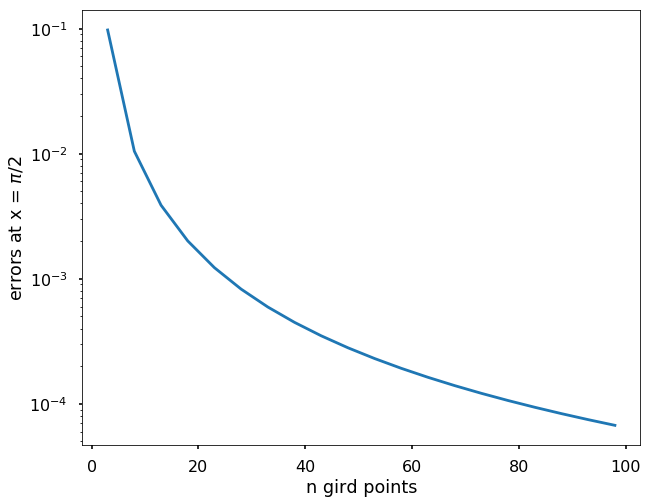

In [3]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

We can see with denser grid points, we are approaching the exact solution on the boundary point. 

The finite difference method can be also applied to higher-order ODEs, but it needs approximation of the higher-order derivatives using the finite difference formula. For example, if we are solving a fourth-order ODE, we will need to use the following:

$$\frac{d^4y}{dx^4} = \frac{y_{i-2}-4y_{i-1}+6y_i-4y_{i+1}+y_{i+2}}{h^4}$$

We won't talk more on the higher-order ODEs, since the idea behind to solve it is similar to the second-order ODE we discussed above. 

<!--NAVIGATION-->
< [23.2 The Shooting Method](chapter23.02-The-Shooting-Method.ipynb) | [Contents](Index.ipynb) | [23.4 Numerical Error and Instability](chapter23.04-Numerical-Error-and-Instability.ipynb) >